In [3]:
import ldpc.codes

import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix
from ldpc import BpDecoder, BpOsdDecoder
import ldpc.code_util
from decoder_performance import compute_logical_error_rate
from multiple_stabilizers import stabilizer_shape_code_matrices
import matplotlib.pyplot as plt

def simulate_decoder_performance(
    height,
    width,
    m, # number of rows of the stabilizer shape
    stabilizer_shape,
    run_count=1000,
    error_rates=np.linspace(0.01, 0.13, 13),
    DECODER='BpOsdDecoder',
    bp_method="minimum_sum",
    bp_max_iter=0, # if set to zero, the maximum number of iterations is set to the number of qubits
    ms_scaling_factor=0.625,
    osd_method="OSD_CS",
    osd_order=60,
):
    """
    Simulate the performance of a decoder on a 2D grid with a given stabilizer shape.

    Parameters:
    - height (int): Height of the grid.
    - width (int): Width of the grid.
    - m (int): Number of rows in the stabilizer shape.
    - stabilizer_shape (np.ndarray): The shape of the stabilizer as a numpy array.
    - run_count (int): Number of runs to perform for each error rate.
    - error_rates (np.ndarray): Array of error rates to test.
    - DECODER (str): Type of decoder to use ('BpOsdDecoder' or 'BpDecoder').
    - bp_method (str): Method for BP decoding ('minimum_sum' or 'sum_product').
    - bp_max_iter (int): Maximum number of iterations for BP decoding.
    - ms_scaling_factor (float): Scaling factor for minimum sum decoding.
    - osd_method (str): Method for OSD decoding ('OSD_0', 'OSD_CS', 'OSD_E').
    - osd_order (int): Order of the OSD method.

    Returns:
    - error_rates (np.ndarray): The error rates tested.
    - logical_error_rates (list): List of logical error rates for each error rate."""

    n = height * width
    bp_max_iter = n if bp_max_iter == 0 else bp_max_iter

    Hx, Hz, Lx, Lz = stabilizer_shape_code_matrices(height, width, m, stabilizer_shape)

    logical_error_rates = []

    for error_rate in error_rates:
        logical_errors = 0
        
        if DECODER == 'BpDecoder':
            bp_decoder = BpDecoder(
                pcm=Hx, # the parity check matrix
                error_rate=float(error_rate), # physical error rate for the BP decoder
                max_iter=bp_max_iter, # the maximum number of iterations for BP
                bp_method=bp_method, # 'minimum_sum' or 'sum_product'
                ms_scaling_factor=ms_scaling_factor, # min sum scaling factor. If set to zero the variable scaling factor method is used
                schedule='parallel'
            )

            logical_error_rate_bp = compute_logical_error_rate(
                Hx, Lx, error_rate, run_count, bp_decoder, run_label="BP", DEBUG=False
            )
            
            logical_error_rates.append(logical_error_rate_bp)
            
        elif DECODER == 'BpOsdDecoder':
            bp_osd_decoder = BpOsdDecoder(
                pcm=Hx, # the parity check matrix
                error_rate=float(error_rate), # physical error rate for the BP decoder
                max_iter=bp_max_iter, # the maximum number of iterations for BP
                bp_method=bp_method, # 'minimum_sum' or 'sum_product'
                ms_scaling_factor=ms_scaling_factor, # min sum scaling factor. If set to zero the variable scaling factor method is used
                schedule='parallel',
                osd_method=osd_method,  # 'OSD_0', 'OSD_CS', 'OSD_E'
                osd_order=osd_order # order of the OSD method
            )

            logical_error_rate_bp_osd = compute_logical_error_rate(
                Hx, Lx, error_rate, run_count, bp_osd_decoder, run_label=f"BP+OSD ({osd_method}, order {osd_order})", DEBUG=False
            )

            logical_error_rates.append(logical_error_rate_bp_osd)

    print(f"Error rates: {error_rates}")
    print(f"Logical error rates: {logical_error_rates}")

    return error_rates, logical_error_rates



stabilizer_shape = np.array([[0, 1, 0],
                             [1, 1, 1],
                             [0, 0, 0]])



height = 3
width = 10
m = 2

# error_rates, logical_error_rates_osd_0 = simulate_decoder_performance(
#     height, width, m, stabilizer_shape, run_count=1000, error_rates=np.linspace(0.01, 0.13, 13), bp_method="minimum_sum", osd_method="OSD_0", osd_order=0
# )

# error_rates_bp, logical_error_rates_bp = simulate_decoder_performance(
#     height, width, m, stabilizer_shape, run_count=1000, error_rates=np.linspace(0.01, 0.15, 15), DECODER='BpDecoder', bp_method="minimum_sum", bp_max_iter=0
# )

# OSD-CS
error_rates_osd_cs, logical_error_rates_osd_cs = simulate_decoder_performance(
    height, width, m, stabilizer_shape, run_count=10000000, error_rates=np.linspace(0.001, 0.012, 12), DECODER='BpOsdDecoder', osd_method="OSD_CS", osd_order=10
)


Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Codewords for height=3, width=10, m=2: 10 codewords generated.
Decoder BP+OSD (OSD_CS, order 10) finished in 233.24 seconds with 0 failures out of 10000000 runs.
Logical error rate for BP+OSD (OSD_CS, order 10): 0.0
Decoder BP+OSD (OSD_CS, order 10) finished in 235.42 seconds with 0 failures out of 10000000 runs.
Logical error rate for BP+OSD (OSD_CS, order 10): 0.0
Decoder BP+OSD (OSD_CS, order 10) finished in 236.08 seconds with 0 failures out of 10000000 runs.
Logical error rate for BP+OSD (OSD_CS, order 10): 0.0
Decoder BP+OSD (OSD_CS, order 10) finished in 235.71 seconds with 0 failures out of 10000000 runs.
Logical error rate for BP+OSD (OSD_CS, order 10): 0.0
Decoder BP+OSD (OSD_CS, order 10) finished in 236.79 seconds with 2 failures out of 10000000 runs.
Logical error rate for BP+OSD (OSD_CS, order 10): 2e-07
Decoder BP+OSD (OSD_CS, order 10) finished in 239.19 seconds with 6 failures out of 10000000 runs.
Logical error rate for BP

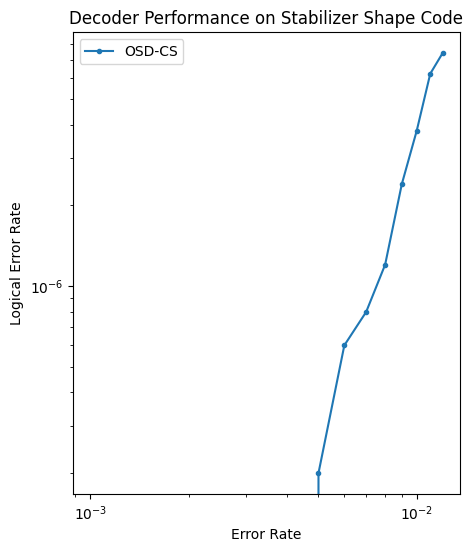

In [9]:
plt.figure(figsize=(5, 6))
plt.title("Decoder Performance on Stabilizer Shape Code")
plt.xlabel("Error Rate")
plt.ylabel("Logical Error Rate")
plt.xscale('log')
plt.yscale('log')

# plt.plot(error_rates_bp, logical_error_rates_bp, label="BP")
plt.plot(error_rates_osd_cs, logical_error_rates_osd_cs, marker='.', label="OSD-CS")
# plt.plot(error_rates_osd_cs, error_rates_osd_cs, label="y=x", linestyle=':', color='gray')
plt.legend()
plt.show()

In [10]:

stabilizer_shape = np.array([[0, 1, 0],
                             [1, 1, 1],
                             [0, 0, 0]])



height = 3
width = 10
m = 2



# BP
error_rates_bp, logical_error_rates_bp = simulate_decoder_performance(
    height, width, m, stabilizer_shape, run_count=1000000, error_rates=np.linspace(0.001, 0.012, 12), DECODER='BpDecoder', bp_method="minimum_sum", bp_max_iter=0
)

# OSD-0
error_rates, logical_error_rates_osd_0 = simulate_decoder_performance(
    height, width, m, stabilizer_shape, run_count=1000000, error_rates=np.linspace(0.001, 0.012, 12), bp_method="minimum_sum", osd_method="OSD_0", osd_order=0
)

# OSD-CS
error_rates_osd_cs, logical_error_rates_osd_cs = simulate_decoder_performance(
    height, width, m, stabilizer_shape, run_count=1000000, error_rates=np.linspace(0.001, 0.012, 12), DECODER='BpOsdDecoder', osd_method="OSD_CS", osd_order=10
)


Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Codewords for height=3, width=10, m=2: 10 codewords generated.
Decoder BP finished in 23.26 seconds with 1 failures out of 1000000 runs.
Logical error rate for BP: 1e-06
Decoder BP finished in 23.32 seconds with 9 failures out of 1000000 runs.
Logical error rate for BP: 9e-06
Decoder BP finished in 23.50 seconds with 14 failures out of 1000000 runs.
Logical error rate for BP: 1.4e-05
Decoder BP finished in 23.59 seconds with 44 failures out of 1000000 runs.
Logical error rate for BP: 4.4e-05
Decoder BP finished in 23.48 seconds with 76 failures out of 1000000 runs.
Logical error rate for BP: 7.6e-05
Decoder BP finished in 23.58 seconds with 130 failures out of 1000000 runs.
Logical error rate for BP: 0.00013
Decoder BP finished in 23.87 seconds with 175 failures out of 1000000 runs.
Logical error rate for BP: 0.000175
Decoder BP finished in 23.79 seconds with 274 failures out of 1000000 runs.
Logical error rate for BP: 0.000274
Decoder BP f